# 회귀나무(Decision Tree Regressor)
#### **사후 가지치기**
: 나무가 완성된 후에 하단 노드부터 유의미하지 않다고 판단되는 Subtree를 끝노드로 변환시키는 방법    

#### [Cost Complexity Pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)    
$R_\alpha(T) = R(T) + \alpha\vert T \vert$

  - 위의 비용복잡도(Cost complexity) 식을 최소화 시키는 과정(CCP)
  - Weakest link pruning이라고도 한다.
  - 가지가 있을 때와 처낼 때 불순도의 차이가 거의 없는 가지(Weakest Link)를 가지치기하는 메커니즘
  - 모든 Subtree를 고려하진 않아 Local Minima에 빠질 수 있다.

    
참고 : https://zephyrus1111.tistory.com/131

### 1. 데이터 로드 및 전처리

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# # 한글 폰트 '나눔고딕 설치'
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib
#한글꺠짐 방지
# matplotlib.rcParams['font.family'] ='NanumBarunGothic'
# matplotlib.rcParams['axes.unicode_minus'] =False

In [4]:
# 데이터 로드
URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 경로 설정
data=pd.read_csv(URL+"data/Fault_data.csv",encoding="EUC-KR")

In [5]:
data.drop(["자재구분","END_DATE_TIME"],axis=1,inplace=True)
data.dropna(axis=1,inplace=True)

#X,Y 분할
Y=data["Y"].copy()
X=data.drop("Y",axis=1)
X.head(3)

CHAMBER  TAE.STDDEV0  TAE.MEAN0  TAE.RANGE0  PC.STDDEV0  PC.MEAN0  \
0        4     0.044554  38.083127    0.254154    0.124753  0.044329   
1        2     0.034801  38.052395    0.063538    0.177575  0.342131   
2        3     0.030089  38.046407    0.127080    0.137559  0.063983   

   PC.RANGE0  CROT.STDDEV0  CROT.MEAN0  CROT.RANGE0  ...  PC.RANGE12  \
0   0.439883             0          35            0  ...   17.350926   
1   0.439883             0          27            0  ...    1.466280   
2   0.488759             0          15            0  ...   13.098728   

   TAE.STDDEV9  TAE.MEAN9  TAE.RANGE9  CROT.STDDEV9  CROT.MEAN9  CROT.RANGE9  \
0     0.032832  35.011650    0.127077             0          35            0   
1     0.020858  35.550245    0.063540             0          27            0   
2     0.021635  36.013373    0.063538             0          15            0   

   PC.STDDEV9   PC.MEAN9  PC.RANGE9  
0    0.405343  45.124841   3.079182  
1    1.923012  45.350277  15.004887  
2    0.161640  45.071393   0.977516  

[3 rows x 136 columns]

### 2. 평가 지표 함수

In [6]:
# 평가 지표 출력 함수
def print_all_reg(Y_test,pred):
    print("model의 MSE 값은 {:.3f}".format(mean_squared_error(Y_test,pred)))
    print("model의 MAE 값은 {:.3f}".format(mean_absolute_error(Y_test, pred)))
    print("model의 MAPE 값은 {:.3f}".format(mean_absolute_percentage_error(Y_test, pred)))
    print("model의 r2 값은 {:.3f}".format(r2_score(Y_test, pred)))

### 3. 모델 학습 및 예측

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3,shuffle =True)

In [41]:
from sklearn.tree import DecisionTreeRegressor

ccp_alpha_list = np.linspace(0, 1000, num=500) # 0부터 1000까지 등간격으로 500개의 수 출력
# ccp_alpha_list2 = np.arange(0, 100, 5) # 0부터 100까지 씩 증가하는 수 출력
train_scores =[]
test_scores =[]
for alpha in ccp_alpha_list:
    model = DecisionTreeRegressor(ccp_alpha= alpha,max_depth = 500)  # ccp_alpha 값보다 작으면서 비용복잡도가 가장 큰 Subtree, 최대 깊이 500 설정
    model.fit(X_train,Y_train) # 훈련 데이터로 트리 학습

    preds_train = model.predict(X_train)
    preds = model.predict(X_test)

    train_scores.append(mean_absolute_error(Y_train,preds_train))  # train score 저장, 평가지표 MAE
    test_scores.append(mean_absolute_error(Y_test,preds)) # test score 저장, 평가지표 MAE

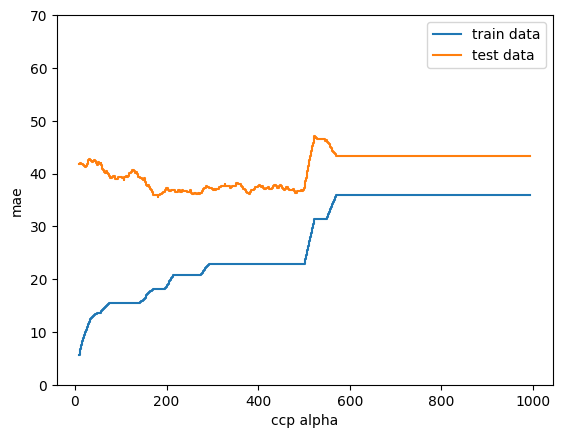

가장 좋은 test 성능을 보이는 ccp_alpha 값: 160.3206412825651


In [45]:
fig, ax = plt.subplots()
ax.set_xlabel("ccp alpha")
ax.set_ylabel("mae")

# #ax.set_title("나무 복잡도 증가에 따른 오분류율 그래프")
# ax.plot(ccp_alpha_list, train_scores,  label="train data", drawstyle="steps-post") #train_socres 데이터 10개단위로 이동평균, 중심점은 5번째 데이터
# ax.plot(ccp_alpha_list, test_scores,  label="test data", drawstyle="steps-post")


#ax.set_title("나무 복잡도 증가에 따른 오분류율 그래프")
ax.plot(ccp_alpha_list, pd.Series(train_scores).rolling(10,center =True).mean(),  label="train data", drawstyle="steps-post") #train_socres 데이터 10개단위로 이동평균, 중심점은 5번째 데이터
ax.plot(ccp_alpha_list, pd.Series(test_scores).rolling(10,center=True).mean(),  label="test data", drawstyle="steps-post")

#ax.plot(ccp_alpha_list, train_scores, drawstyle="steps-post")
#ax.plot(ccp_alpha_list, test_scores, drawstyle="steps-post")

ax.legend()
plt.ylim(0,70)
plt.show()
plt.close('all')

best_ccp_alpha_index = np.argmin(test_scores)
best_ccp_alpha = ccp_alpha_list[best_ccp_alpha_index]
print("가장 좋은 test 성능을 보이는 ccp_alpha 값:", best_ccp_alpha)

In [46]:

alpha = 161
model = DecisionTreeRegressor(ccp_alpha= alpha)
model.fit(X_train,Y_train)
preds = model.predict(X_test)

preds_train = model.predict(X_train) # X_train데이터와 학습한 모델로 예측값 생성

print_all_reg(Y_train,preds_train) # Y_train값과 예측값을 비교하여 모델 성능지표 출력
print("")
print_all_reg(Y_test,preds) # 실제 Y_test값과 예측값을 비교하여 모델 성능지표 출력

model의 MSE 값은 679.286
model의 MAE 값은 18.066
model의 MAPE 값은 0.486
model의 r2 값은 0.815

model의 MSE 값은 3248.815
model의 MAE 값은 36.179
model의 MAPE 값은 0.687
model의 r2 값은 0.312


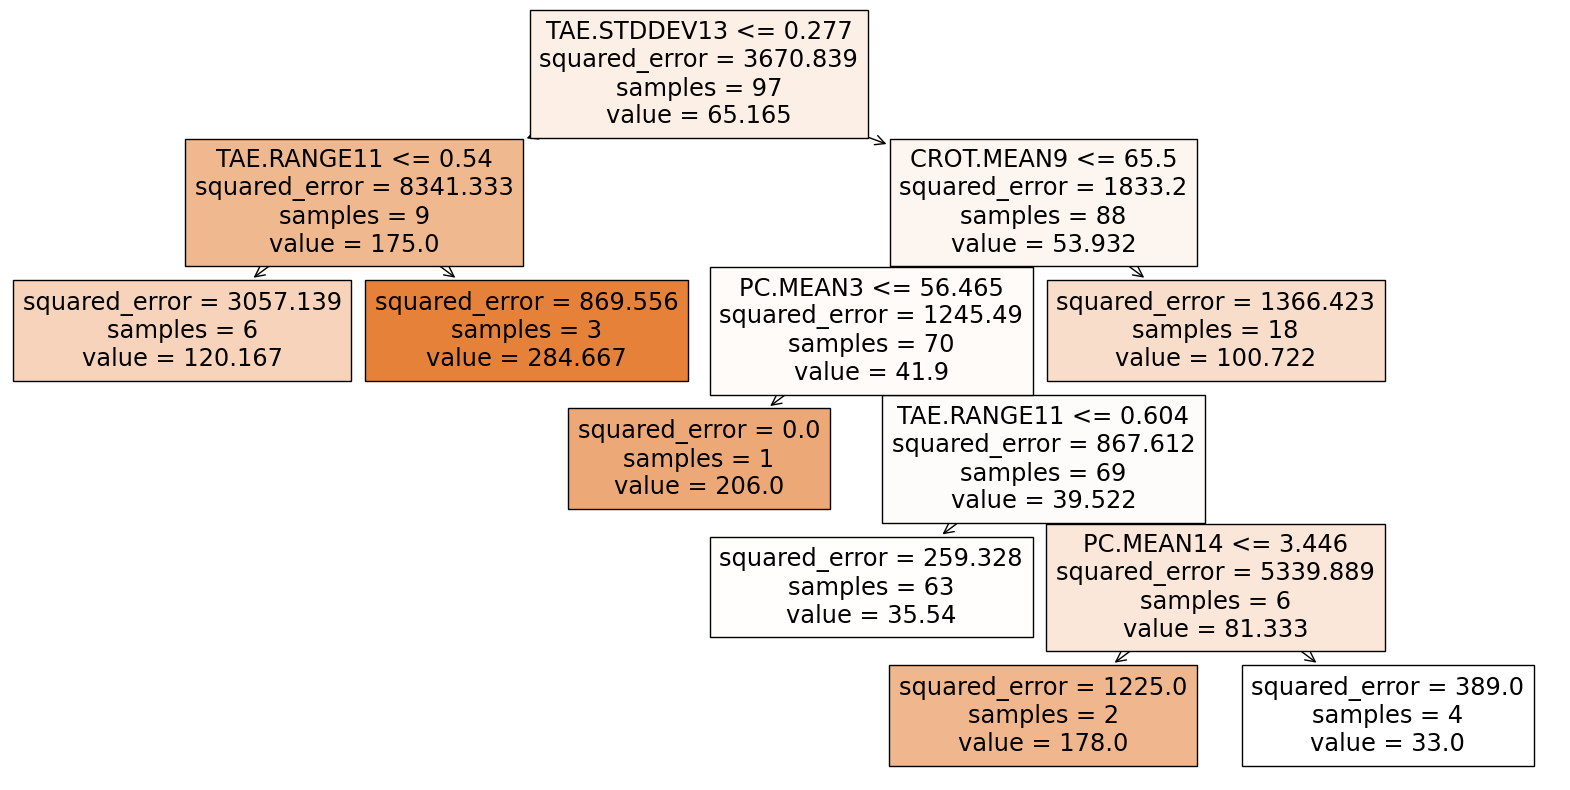

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 트리 시각화
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()